# Classification Problems in NN using Pytorch

Classification can be binary ir multi-categorical and the general problem invoves training our models based on a set training data set and testing our models on some test cases.

## Step 1: Data 
You need a dataset to train and test the model on.

In [1]:
import sklearn
from sklearn.datasets import make_circles

In [15]:
# Exploring the dataset
n_samples = 1000

# Create circles
X,y = make_circles(n_samples= n_samples,
                   noise = 0.03,
                   random_state=42)


In [16]:
print(f"First 5 samples of X {X[:5]}")

print(f"First 5 samples of y {y[:5]}")

First 5 samples of X [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y [1 1 1 1 0]


In [17]:
# here we can observe that y is a part of binary classified data

import pandas as pd
circles = pd.DataFrame({
    "X1" : X[:,0],
    "X2" : X[:,1],
    "Label": y
})
circles

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


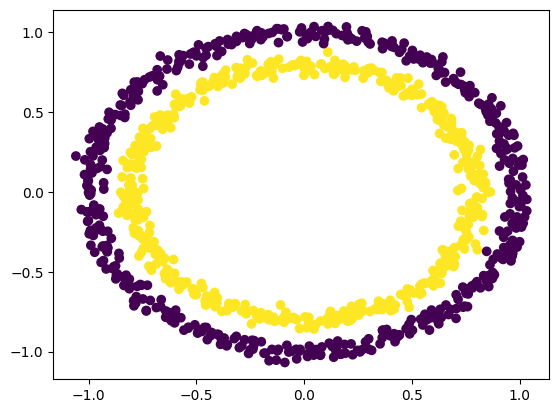

In [18]:
# Visualising the Data

import matplotlib.pyplot as plt

plt.scatter(
    x = X[:,0],
    y = X[:,1],
    c = y,
    
)

### 1.1 Check input and output shapes

In [19]:
X.shape , y.shape

((1000, 2), (1000,))

### 1.2 Turn data into samples and train test split

In [20]:
import torch

X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

## 2. Building a Model


In [65]:
# Construct a model that subclasses nn.Module
from torch import nn

class CircleModelVo(nn.Module):
    """Classification model for the make_circles dataset."""
    
    def __init__(self):
        super().__init__()
        
        # Creating layers that are able to handel the shapes of our data 
        self.layer_1 = nn.Linear(
            in_features=2,# Number of columns of the input matrix
            out_features=16
        )
        
        self.layer_2 = nn.Linear(
            in_features=16,# should match wiht the outfeatures of the previous layer
            out_features=128
        )
        
        self.layer_3 = nn.Linear(
            in_features=128,
            out_features=256
        )
        
        self.layer_4 = nn.Linear(
            in_features=256,
            out_features= 1
        )
        
    # Definfing a forawrd method to outline the forward pass
    def forward(self,x):
        x1 = torch.relu(self.layer_1(x))
        x2 = torch.relu(self.layer_2(x1))
        x3 = torch.relu(self.layer_3(x2))
        return self.layer_4((x3))
    
# Make an instant of the model class
model_1 = CircleModelVo()   

In [26]:
# An easier way to write the above code can just be
#model_1 = nn.Sequential(
 #   nn.Linear(2,8),
  #  nn.Linear(8,1)
#)

In [66]:
# Making a few predictions without any training 
with torch.inference_mode():
    un_trained_preds = model_1(X_test)

### 2.1 Setup a loss function and optimiser

In [68]:
loss_fn = nn.BCEWithLogitsLoss() # Binary cross entropy with Logit
                                 # This has the singmoid function built in
# BCEloss requires input to have gone through the sigmoid function

# Optimiser
optimiser = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.001)

In [40]:
# Calculating Accuracy = (True_postive/(True_pos + True_neg))

def accuracy_function(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## 3 Train Model

NOTE: 
The ouput of our <code>model_0</code> is going to be **LOGITS** and they need to be converted into prediction probs by passing them through an activation function.

Round for binary 
ArgMax for multi-classification

In [69]:
y_logits = model_1(X_test)
y_logits
# Clearly this needs an activation function

tensor([[-0.0517],
        [-0.0664],
        [-0.0403],
        [-0.0599],
        [-0.0156],
        [-0.0209],
        [-0.0557],
        [-0.0492],
        [-0.0437],
        [-0.0671],
        [-0.0548],
        [-0.0542],
        [-0.0520],
        [-0.0249],
        [-0.0552],
        [-0.0417],
        [-0.0595],
        [-0.0634],
        [-0.0560],
        [-0.0760],
        [-0.0669],
        [-0.0413],
        [-0.0614],
        [-0.0762],
        [-0.0585],
        [-0.0519],
        [-0.0171],
        [-0.0291],
        [-0.0586],
        [-0.0230],
        [-0.0543],
        [-0.0590],
        [-0.0563],
        [-0.0160],
        [-0.0567],
        [-0.0628],
        [-0.0567],
        [-0.0290],
        [-0.0177],
        [-0.0227],
        [-0.0648],
        [-0.0542],
        [-0.0593],
        [-0.0104],
        [-0.0582],
        [-0.0622],
        [-0.0132],
        [-0.0669],
        [-0.0616],
        [-0.0182],
        [-0.0592],
        [-0.0592],
        [-0.

In [70]:
# Use a sigmoid fucntion to convert the logits into pre-diction probs

y_pred_probs = torch.sigmoid(y_logits)

# To find the predicted labels
torch.round(y_pred_probs)[:5]

# And this works beautifully

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<SliceBackward0>)

### Building a training and testing loop

In [71]:
torch.manual_seed(42)

# Epoch
epochs = 1000

for epoch in range(epochs):
    ### Training 
    model_1.train()
    
    # 1. forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # ~Calculate the accuracy~
    loss = loss_fn(y_logits, ## nn.BCEWithLogitsLoss epects this value to be logits
                   y_train)
    
    acc = accuracy_function(y_train,
                            y_pred)
    
    # 2. Optimser Zero grad
    optimiser.zero_grad()
    
    # 3. loss backward
    loss.backward()
    
    # 4. Optimiser step
    optimiser.step()
    
    ### Testing 
    model_1.eval()
    
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))    
    
        test_loss = loss_fn(
            test_logits,
            y_test
        )
        test_acc = accuracy_function(
            y_test,
            test_preds
        )
    
    # Print out stuff
    if epoch% 10 == 0:
        print(f"{epoch} | {loss}| {acc} | {test_loss} ")


0 | 0.6927664875984192| 50.0 | 0.6925064325332642 
10 | 0.6927549242973328| 50.0 | 0.6924982666969299 
20 | 0.6927434802055359| 50.0 | 0.6924901008605957 
30 | 0.692732036113739| 50.0 | 0.6924819946289062 
40 | 0.6927205920219421| 50.0 | 0.6924738883972168 
50 | 0.6927091479301453| 50.0 | 0.6924659013748169 
60 | 0.6926977634429932| 50.0 | 0.692457914352417 
70 | 0.6926862597465515| 50.0 | 0.6924498677253723 
80 | 0.6926746964454651| 50.0 | 0.6924418807029724 
90 | 0.6926632523536682| 50.0 | 0.692433774471283 
100 | 0.6926516890525818| 50.0 | 0.6924256682395935 
110 | 0.6926401257514954| 50.0 | 0.6924176216125488 
120 | 0.6926286220550537| 50.0 | 0.6924094557762146 
130 | 0.6926170587539673| 50.0 | 0.6924011707305908 
140 | 0.6926053762435913| 50.0 | 0.6923930644989014 
150 | 0.6925937533378601| 50.0 | 0.6923847794532776 
160 | 0.6925820112228394| 50.0 | 0.6923766136169434 
170 | 0.6925704479217529| 50.0 | 0.6923684477806091 
180 | 0.692558765411377| 50.0 | 0.6923604011535645 
190 | 0.

## 4 Make predictions and evaluate the model

In [72]:
import requests
from pathlib import Path

# Dowload helper functions from Learn PyTorch rep
if Path("helper_functions.py").is_file():
    print("Exists")
else:
    print("Downloading")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as file:
        file.write(request.content)
        
from helper_functions import plot_predictions , plot_decision_boundary


Exists


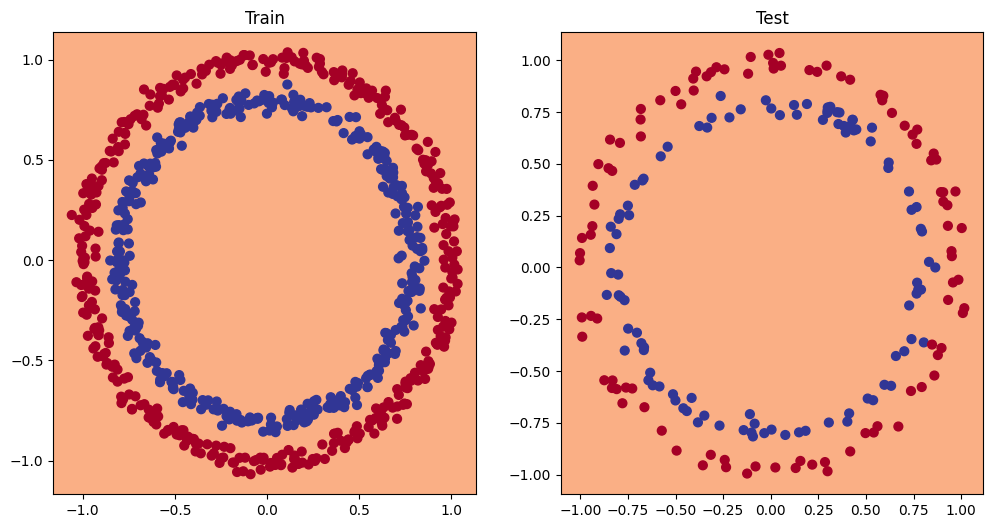

In [73]:
# Plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## 5. Improving a Model

* Add more layers
* Add more hidden units
* Fit for longer
* Changing the activation function
* Change Learning rate


### 6. Adding non-linearity in the data predictor thingy

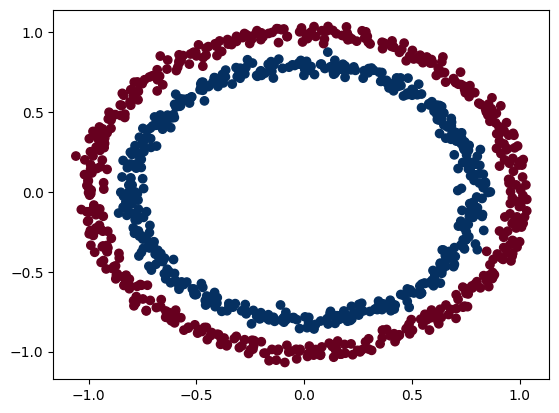

In [75]:
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1000
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

plt.scatter(X[:,0],X[:,1],c = y, cmap=plt.cm.RdBu)

In [76]:
# convert data to tensors and then to train test split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test
X_train, y_train, X_test, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


